# PROCESAMIENTO DIGITAL DE IMÁGENES  
# Capítulo 2: Muestreo y Cuantización Digital

**OBJETIVOS PEDAGÓGICOS:**
- Entender el muestreo espacial (resolución)
- Comprender la cuantización de niveles de gris
- Implementar histogramas desde cero
- Analizar el efecto de reducir información en imágenes

**CONEXIÓN CON py5:**
En py5 trabajamos con píxeles individuales usando get() y set().
Ahora veremos cómo la información se digitaliza y procesa matemáticamente.

In [ ]:
import numpy as np
from cv2 import imread
import matplotlib.pyplot as plt

# 1. PREPARACIÓN: DESCARGA DE IMÁGENES DE EJEMPLO

Comenzaremos descargando dos imágenes de ejemplo que utilizaremos para nuestros experimentos:
- mandril.png: Una imagen natural con detalles finos
- scale.png: Una imagen sintética para análisis técnico

In [ ]:
!wget https://www.dropbox.com/s/dbwjqs0mfo5hgw6/mandril.png
#!wget https://www.dropbox.com/s/vjxcddg5rgap35i/scale.png

print("📁 Imágenes descargadas:")
print("mandril.png - Imagen natural con detalles finos")
print("scale.png - Imagen sintética para análisis técnico")

--2025-08-27 00:11:19--  https://www.dropbox.com/s/dbwjqs0mfo5hgw6/mandril.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.13.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.13.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/fr6sxiar91o0v21lrb3ie/mandril.png?rlkey=kec7fzhsm8p5glly49z38u7mc [following]
--2025-08-27 00:11:19--  https://www.dropbox.com/scl/fi/fr6sxiar91o0v21lrb3ie/mandril.png?rlkey=kec7fzhsm8p5glly49z38u7mc
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucff90ce361e215b7bfbfa944f6b.dl.dropboxusercontent.com/cd/0/inline/CwLAkgqYij2SeVIxls28gSrDO3ldYJHnJqn4_nuz9gdcfuAi4JVR2PuwHp0HdHwE_6SGIrJGeSCWI3dmhGzpFdTAQUH5BmiWvQLYjhh_dKeLHSlPmY6cWodzHV2D2rPOy1c/file# [following]
--2025-08-27 00:11:20--  https://ucff90ce361e215b7bfbfa944f6b.dl.dropboxusercontent.com/cd/0/inline/CwLAkgqYij2SeVIxls28gSr

# 2. FUNCIÓN AUXILIAR: ANÁLISIS DE CARACTERÍSTICAS DE IMAGEN

Definiremos una función para analizar las características básicas de una imagen, incluyendo:
- Dimensiones
- Valor máximo y mínimo
- Tipo de datos
- Rango dinámico

In [ ]:
def analizar_imagen(img, nombre="Imagen"):
    """
    Función para analizar características básicas de una imagen

    Parámetros:
    - img: matriz de imagen (numpy array)
    - nombre: nombre descriptivo para mostrar
    """
    print(f"\nANÁLISIS DE {nombre.upper()}:")
    print(f"Dimensiones: {img.shape}")
    print(f"Valor máximo: {np.max(img)}")
    print(f"Valor mínimo: {np.min(img)}")
    print(f"Tipo de datos: {img.dtype}")

    # Información adicional sobre el rango dinámico
    rango = np.max(img) - np.min(img)
    print(f"Rango dinámico: {rango}")

# 3. SELECCIÓN Y CARGA DE IMAGEN

Seleccionaremos una imagen para nuestros experimentos de muestreo y cuantización.
Cargaremos la imagen y la convertiremos a escala de grises para facilitar el análisis.

Nota: Puedes cambiar la variable `st_img` para experimentar con diferentes imágenes.

SELECCIÓN DE IMAGEN PARA EL EXPERIMENTO
📷 Imagen seleccionada: mandril.png


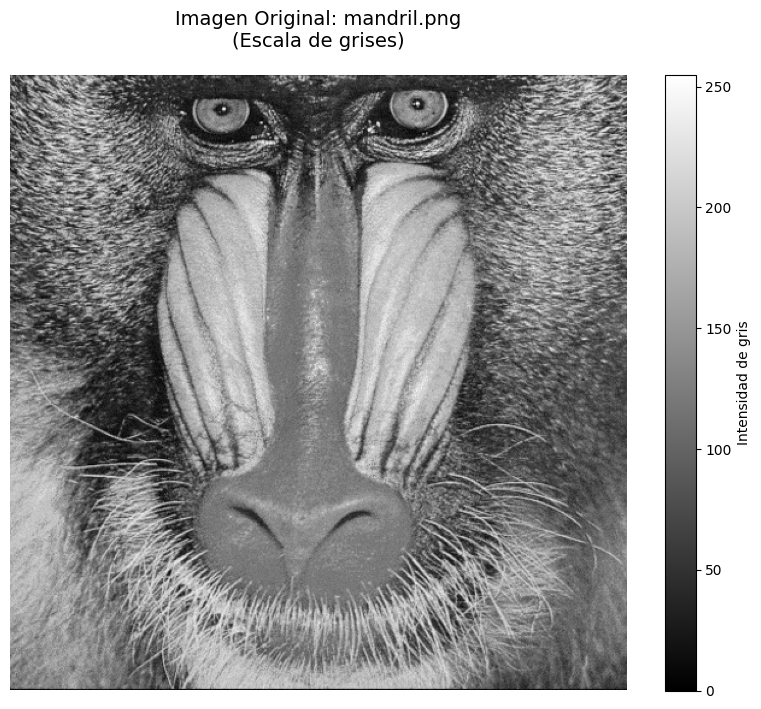


ANÁLISIS DE ORIGINAL:
Dimensiones: (512, 512)
Valor máximo: 255
Valor mínimo: 0
Tipo de datos: uint8
Rango dinámico: 255


In [ ]:
print("SELECCIÓN DE IMAGEN PARA EL EXPERIMENTO")

# Puedes cambiar esta línea para experimentar con diferentes imágenes
st_img = 'mandril.png'  # Imagen con muchos detalles
# st_img = 'scale.png'  # Imagen sintética para análisis técnico

print(f"📷 Imagen seleccionada: {st_img}")

# Cargar imagen y convertir a escala de grises
img = imread(st_img)
X = img[:,:,0]  # Tomar solo un canal (escala de grises)

# Visualización inicial
plt.figure(figsize=(10, 8))
plt.imshow(X, cmap='gray', vmin=0, vmax=255)
plt.title(f'Imagen Original: {st_img}\n(Escala de grises)', fontsize=14, pad=20)
plt.colorbar(label='Intensidad de gris')
plt.axis('off')
plt.show()

analizar_imagen(X, "Original")

# 4. MUESTREO ESPACIAL: REDUCCIÓN DE RESOLUCIÓN

**CONCEPTO:**
El muestreo espacial determina cuántos píxeles tenemos por área.
Menor muestreo = menor resolución = menos detalles

En este experimento, reduciremos la resolución de la imagen tomando solo un subconjunto de píxeles. El parámetro `d` determina el factor de submuestreo: tomaremos 1 de cada `d` píxeles en ambas direcciones.

EXPERIMENTO 1: MUESTREO ESPACIAL

Parámetro de muestreo: d = 2
   Tomaremos 1 de cada 2 píxeles en ambas direcciones
   Imagen original: 512 x 512 = 262,144 píxeles
   Imagen muestreada: 256 x 256 = 65,536 píxeles
   Reducción: 4.0x menos píxeles

🔄 Procesando muestreo espacial...


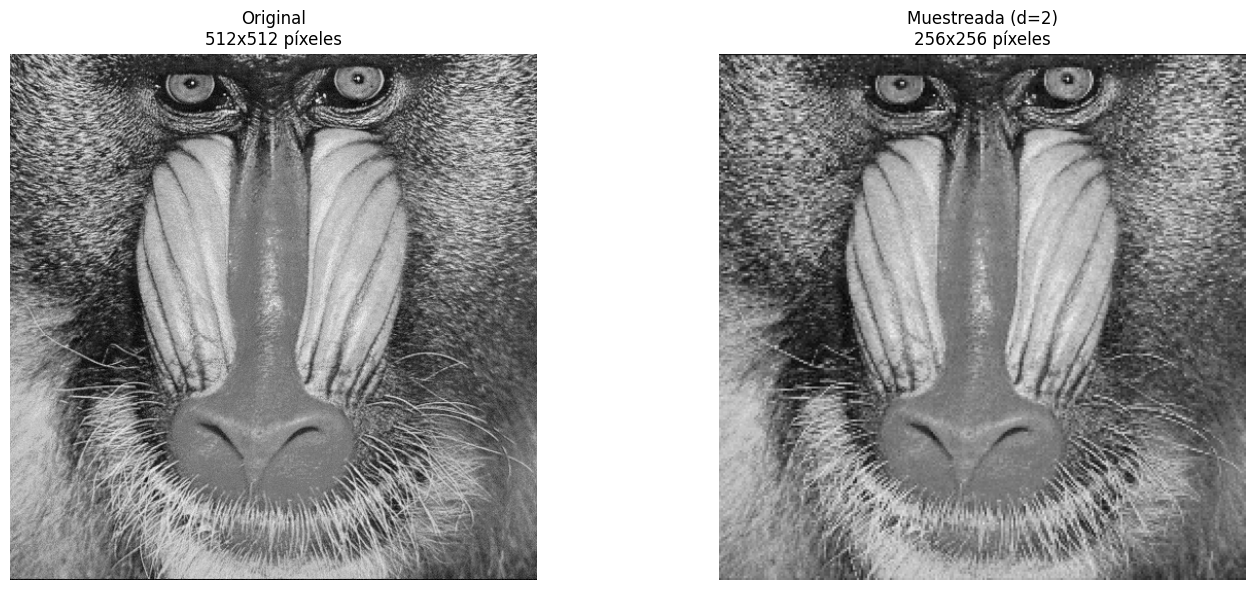


ANÁLISIS DE MUESTREADA (D=2):
Dimensiones: (256, 256)
Valor máximo: 246
Valor mínimo: 0
Tipo de datos: uint8
Rango dinámico: 246


In [ ]:
print("="*60)
print("EXPERIMENTO 1: MUESTREO ESPACIAL")
print("="*60)

# Parámetro de muestreo
d = 2   # Tomar cada d-ésimo píxel
print(f"\nParámetro de muestreo: d = {d}")
print(f"   Tomaremos 1 de cada {d} píxeles en ambas direcciones")

# Obtener dimensiones originales
(Nx, Mx) = X.shape
print(f"   Imagen original: {Nx} x {Mx} = {Nx*Mx:,} píxeles")

# Crear índices de muestreo
ix = range(0, Nx, d)  # Índices en dirección vertical
jx = range(0, Mx, d)  # Índices en dirección horizontal
Ny = len(ix)  # Nueva altura
My = len(jx)  # Nuevo ancho

print(f"   Imagen muestreada: {Ny} x {My} = {Ny*My:,} píxeles")
print(f"   Reducción: {(Nx*Mx)/(Ny*My):.1f}x menos píxeles")

# Realizar el muestreo
print("\n🔄 Procesando muestreo espacial...")
Y = np.zeros((Ny, My), np.uint8)
for i in range(Ny):
    for j in range(My):
        Y[i,j] = X[ix[i], jx[j]]

# Visualización comparativa
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].imshow(X, cmap='gray', vmin=0, vmax=255)
axes[0].set_title(f'Original\n{Nx}x{Mx} píxeles', fontsize=12)
axes[0].axis('off')

axes[1].imshow(Y, cmap='gray', vmin=0, vmax=255)
axes[1].set_title(f'Muestreada (d={d})\n{Ny}x{My} píxeles', fontsize=12)
axes[1].axis('off')

plt.tight_layout()
plt.show()

analizar_imagen(Y, f"Muestreada (d={d})")

# 5. IMPLEMENTACIÓN DE HISTOGRAMA DESDE CERO

Los histogramas son una herramienta fundamental para el análisis de imágenes. Representan la distribución de intensidades en la imagen.

A continuación, implementaremos un histograma desde cero, contando manualmente cuántos píxeles tienen cada nivel de intensidad.

IMPLEMENTACIÓN: HISTOGRAMA MANUAL
Calculando histograma con 256 bins...
Procesados 65,536 píxeles


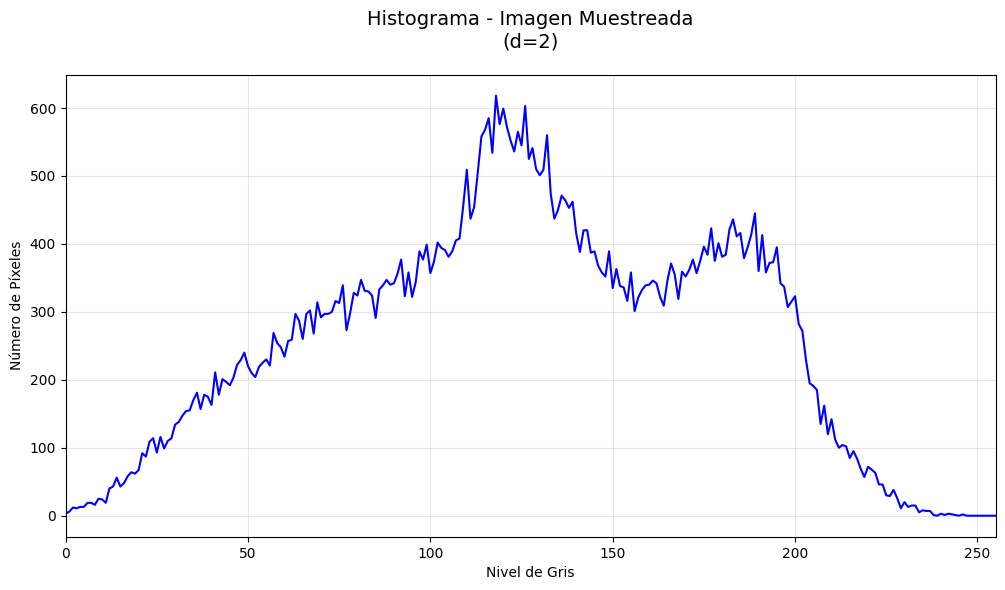

Análisis del histograma:
   Máximo conteo: 618 píxeles
   Nivel más frecuente: 118


In [ ]:
print("="*60)
print("IMPLEMENTACIÓN: HISTOGRAMA MANUAL")
print("="*60)

def calcular_histograma(imagen, n_bins=256):
    """
    📊 Calcula histograma de una imagen implementando el algoritmo desde cero

    Parámetros:
    - imagen: matriz 2D de la imagen
    - n_bins: número de bins del histograma (por defecto 256 para uint8)

    Retorna:
    - h: array con el conteo de cada nivel de gris
    """
    print(f"Calculando histograma con {n_bins} bins...")

    (N, M) = imagen.shape
    h = np.zeros((n_bins,), dtype=int)  # Inicializar contador

    # Contar cada píxel
    total_pixels = N * M
    processed = 0

    for i in range(N):
        for j in range(M):
            valor_pixel = imagen[i,j]
            h[valor_pixel] = h[valor_pixel] + 1
            processed += 1

    print(f"Procesados {processed:,} píxeles")
    return h

# Calcular histograma de la imagen muestreada
n_bins = 256
h = calcular_histograma(Y, n_bins)

# Visualizar histograma
plt.figure(figsize=(12, 6))
plt.plot(range(n_bins), h, 'b-', linewidth=1.5)
plt.title(f'Histograma - Imagen Muestreada\n(d={d})', fontsize=14, pad=20)
plt.xlabel('Nivel de Gris')
plt.ylabel('Número de Píxeles')
plt.grid(True, alpha=0.3)
plt.xlim(0, 255)
plt.show()

print(f"Análisis del histograma:")
print(f"   Máximo conteo: {np.max(h)} píxeles")
print(f"   Nivel más frecuente: {np.argmax(h)}")

# 6. CUANTIZACIÓN: REDUCCIÓN DE NIVELES DE GRIS

**CONCEPTO:**
La cuantización determina cuántos niveles de gris diferentes podemos tener.
Menos niveles = menos matices = efecto 'posterizado'

En este experimento, reduciremos el número de niveles de gris en la imagen. El parámetro `q` determina el número de niveles deseados.

EXPERIMENTO 2: CUANTIZACIÓN

Parámetros de cuantización:
   Niveles deseados: 8
   Agrupamiento: cada 32 valores → 1 nivel
   Niveles reales: 8

🔄 Aplicando cuantización a imagen original...


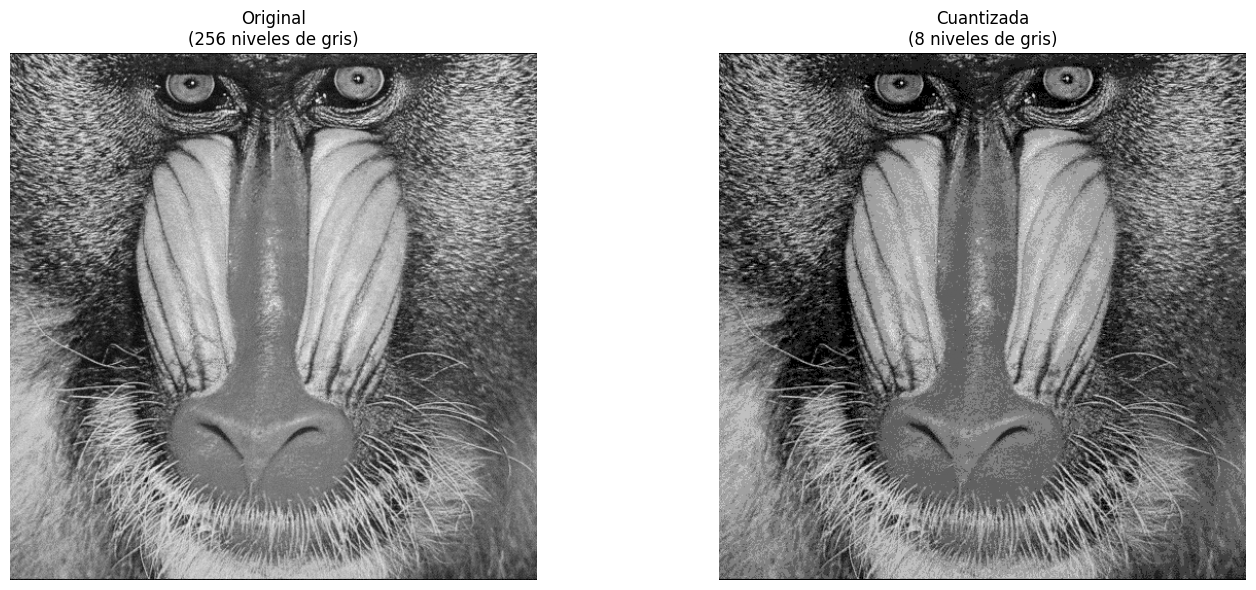


ANÁLISIS DE CUANTIZADA (8 NIVELES):
Dimensiones: (512, 512)
Valor máximo: 224
Valor mínimo: 0
Tipo de datos: uint8
Rango dinámico: 224


In [ ]:
print("="*60)
print("EXPERIMENTO 2: CUANTIZACIÓN")
print("="*60)

# Parámetros de cuantización
q = 8  # Número de niveles de gris deseados
p = int(256/q)  # Cada p valores se agrupan en uno
niveles_reales = int(256/p)

print(f"\nParámetros de cuantización:")
print(f"   Niveles deseados: {q}")
print(f"   Agrupamiento: cada {p} valores → 1 nivel")
print(f"   Niveles reales: {niveles_reales}")

# Aplicar cuantización a la imagen original
print(f"\n🔄 Aplicando cuantización a imagen original...")
(Nx, Mx) = X.shape
Y_cuant = np.zeros((Nx, Mx), np.uint8)

for i in range(Nx):
    for j in range(Mx):
        valor_original = X[i,j]
        # Cuantizar: dividir por p, truncar, y multiplicar por p
        valor_cuantizado = int(np.fix(valor_original/p) * p)
        Y_cuant[i,j] = valor_cuantizado

# Visualización comparativa
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].imshow(X, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Original\n(256 niveles de gris)', fontsize=12)
axes[0].axis('off')

axes[1].imshow(Y_cuant, cmap='gray', vmin=0, vmax=255)
axes[1].set_title(f'Cuantizada\n({niveles_reales} niveles de gris)', fontsize=12)
axes[1].axis('off')

plt.tight_layout()
plt.show()

analizar_imagen(Y_cuant, f"Cuantizada ({niveles_reales} niveles)")

# 7. ANÁLISIS DEL HISTOGRAMA CUANTIZADO

Analizaremos el histograma de la imagen cuantizada para observar cómo la cuantización afecta la distribución de intensidades.

Compararemos el histograma original con el histograma cuantizado para visualizar las diferencias.


📊 ANÁLISIS DEL HISTOGRAMA CUANTIZADO
Calculando histograma con 256 bins...
Procesados 262,144 píxeles
Calculando histograma con 256 bins...
Procesados 262,144 píxeles


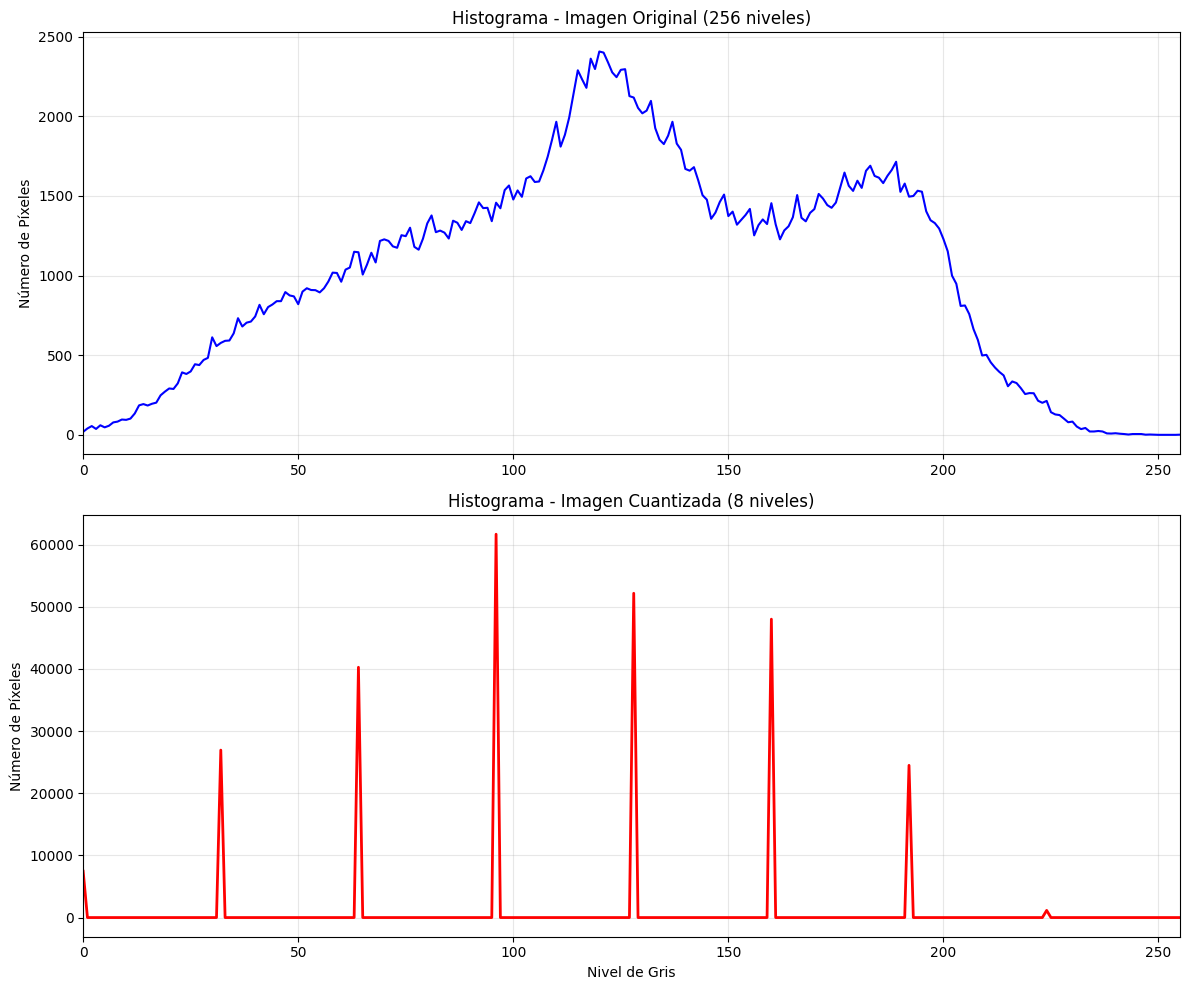


Niveles de gris utilizados (8 de 8):
   [  0  32  64  96 128 160 192 224]

Conteos por nivel:
   Nivel   0:   7457 píxeles
   Nivel  32:  26940 píxeles
   Nivel  64:  40266 píxeles
   Nivel  96:  61669 píxeles
   Nivel 128:  52168 píxeles
   Nivel 160:  48005 píxeles
   Nivel 192:  24489 píxeles
   Nivel 224:   1150 píxeles


In [ ]:
print(f"\n📊 ANÁLISIS DEL HISTOGRAMA CUANTIZADO")

# Calcular histograma de la imagen cuantizada
h_cuant = calcular_histograma(Y_cuant, n_bins)

# Visualización comparativa de histogramas
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Histograma original
axes[0].plot(range(n_bins), calcular_histograma(X, n_bins), 'b-', linewidth=1.5)
axes[0].set_title('Histograma - Imagen Original (256 niveles)', fontsize=12)
axes[0].set_ylabel('Número de Píxeles')
axes[0].grid(True, alpha=0.3)
axes[0].set_xlim(0, 255)

# Histograma cuantizado
axes[1].plot(range(n_bins), h_cuant, 'r-', linewidth=2)
axes[1].set_title(f'Histograma - Imagen Cuantizada ({niveles_reales} niveles)', fontsize=12)
axes[1].set_xlabel('Nivel de Gris')
axes[1].set_ylabel('Número de Píxeles')
axes[1].grid(True, alpha=0.3)
axes[1].set_xlim(0, 255)

plt.tight_layout()
plt.show()

# Mostrar valores no cero del histograma cuantizado
valores_no_cero = np.nonzero(h_cuant)[0]
print(f"\nNiveles de gris utilizados ({len(valores_no_cero)} de {niveles_reales}):")
print(f"   {valores_no_cero}")

print(f"\nConteos por nivel:")
for nivel in valores_no_cero[:10]:  # Mostrar solo los primeros 10
    print(f"   Nivel {nivel:3d}: {h_cuant[nivel]:6d} píxeles")
if len(valores_no_cero) > 10:
    print("   ...")

# 8. RESUMEN Y REFLEXIONES PEDAGÓGICAS

**MUESTREO ESPACIAL:**
- ✅ Controla la resolución de la imagen
- ✅ Menos muestras = menos detalles = archivos más pequeños
- ✅ Fundamental en cámaras digitales y pantallas

**CUANTIZACIÓN:**
- ✅ Controla los niveles de gris disponibles
- ✅ Menos niveles = menos matices = efecto artístico
- ✅ Importante para compresión de imágenes

**HISTOGRAMAS:**
- ✅ Representan la distribución de intensidades
- ✅ Herramienta fundamental para análisis de imágenes
- ✅ Base para muchos algoritmos de mejora

**PRÓXIMA TRANSICIÓN A SCIKIT-IMAGE:**
- Scikit-image automatizará muchas de estas operaciones
- Nos enfocaremos más en algoritmos que en implementación
- Mantendremos la comprensión conceptual desarrollada aquí

**PREGUNTAS PARA REFLEXIONAR:**
1. ¿Cuál es el compromiso entre calidad de imagen y tamaño de archivo?
2. ¿Cómo afecta el muestreo a los detalles finos de la imagen?
3. ¿Qué información nos proporciona la forma del histograma?
4. ¿En qué aplicaciones podría ser útil la cuantización intencional?